In [100]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [103]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [104]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})

In [105]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [106]:
#checking is there any missing values or null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [107]:
# Performing one-hot encoding
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,2,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,2,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,2,front,94.5,171.2,65.5,52.4,2823,...,True,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,4,front,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,4,front,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,front,109.1,188.8,68.9,55.5,2952,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,volvo 144ea,4,front,109.1,188.8,68.8,55.5,3049,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,volvo 244dl,4,front,109.1,188.8,68.9,55.5,3012,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,volvo 246,4,front,109.1,188.8,68.9,55.5,3217,...,False,False,False,False,False,True,False,False,False,False


In [108]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#  label encoding to the 'symboling' column
df['symboling'] = label_encoder.fit_transform(df['symboling'])

df['doornumber'] = label_encoder.fit_transform(df['doornumber'])

df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])

In [109]:
df[['symboling' ,'doornumber','cylindernumber']]

,symboling,doornumber,cylindernumber
0,5,0,2
1,5,0,2
2,3,0,4
3,4,1,2
4,4,1,3
...,...,...,...
200,1,1,2
201,1,1,2
202,1,1,4
203,1,1,4


In [110]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [111]:
#x is the independent and y is the dependent variable
x = df[['symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',  'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df['price'] 

In [112]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [113]:
x_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
190,5,0,94.5,165.7,64.0,51.4,2221,2,109,3.19,...,False,False,False,False,False,False,False,True,False,False
69,2,0,106.7,187.5,70.3,54.9,3495,3,183,3.58,...,False,False,False,False,False,True,False,False,False,False
158,2,1,95.7,166.3,64.4,53.0,2275,2,110,3.27,...,False,False,False,False,False,True,False,False,False,False
154,2,1,95.7,169.7,63.6,59.1,2290,2,92,3.05,...,False,False,False,True,False,False,False,False,False,False
152,3,1,95.7,158.7,63.6,54.5,2015,2,92,3.05,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,3,1,103.5,189.0,66.9,55.7,3055,4,164,3.31,...,False,False,False,False,False,False,False,True,False,False
142,2,1,97.2,172.0,65.4,52.5,2190,2,108,3.62,...,False,False,False,True,False,False,False,False,False,False
121,3,1,93.7,167.3,63.8,50.8,1989,2,90,2.97,...,False,False,False,True,False,False,False,False,False,False
168,4,0,98.4,176.2,65.6,52.0,2536,2,146,3.62,...,False,False,False,False,False,False,False,True,False,False


In [114]:
x_test

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
129,3,0,98.4,175.7,72.3,50.5,3366,5,203,3.94,...,False,False,False,False,False,False,False,True,False,False
185,4,1,97.3,171.7,65.5,55.7,2212,2,109,3.19,...,False,False,False,False,False,False,False,True,False,False
146,2,1,97.0,173.5,65.4,53.0,2290,2,108,3.62,...,False,False,False,True,False,False,False,False,False,False
26,3,1,93.7,157.3,63.8,50.6,1989,2,90,2.97,...,False,False,False,True,False,False,False,False,False,False
54,3,1,93.1,166.8,64.2,54.1,1950,2,91,3.08,...,False,False,False,True,False,False,False,False,False,False
191,2,1,100.4,180.2,66.9,55.1,2661,3,136,3.19,...,False,False,False,False,False,False,False,True,False,False
0,5,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,...,False,False,False,False,False,False,False,True,False,False
11,2,1,101.2,176.8,64.8,54.3,2395,2,108,3.50,...,False,False,False,False,False,False,False,True,False,False
143,2,1,97.2,172.0,65.4,52.5,2340,2,108,3.62,...,False,False,False,False,False,False,False,True,False,False
183,4,0,97.3,171.7,65.5,55.7,2209,2,109,3.19,...,False,False,False,False,False,False,False,True,False,False


In [115]:
reg=LinearRegression()

In [116]:
reg.fit(x_train,y_train)

LinearRegression()

In [117]:
#making predictions
pred=reg.predict(x_test)
pred

array([43393.86548636,  9967.73744209,  8053.54444939,  7293.91834408,
        6695.54915519, 16893.78435751, 15732.40878346, 12657.94051788,
       10273.47729551,  9931.8827644 ,  7227.94826618,  9909.71268851,
        6675.25644816, 13257.01700449, 10973.8618699 , 48875.62612866,
       21760.57337983, 10241.66886117,  9005.05053254,  7698.62611633,
        6242.17282489, 25499.31061949,  7859.96115714, 13047.44993846,
        7239.33477666, 25061.2996344 , 25592.63574125, 26683.33132284,
        9717.07480554,  6238.45860938, 21894.57483649,  6915.15353561,
        9925.77735628, 16030.607247  ,  5901.19009156,  6237.24407219,
       37794.38311221,  6835.39099759, 17767.5201175 , 16995.09492417,
       35681.40827573])

In [118]:
reg.coef_

array([ 2.88659863e+02,  2.81062317e+01,  6.09904616e+01, -6.43294345e+01,
        5.88139689e+02,  2.04210472e+02,  2.58281531e+00,  2.10199837e+03,
        1.26795379e+02, -3.39470411e+03, -3.72534074e+03, -4.25357901e+02,
        5.74231622e+01,  2.04291272e+00,  9.98749078e+00,  1.60401682e+02,
        2.44892810e+03, -2.44892810e+03, -2.14657513e+02,  2.14657513e+02,
        3.28022170e+03, -1.14498085e+03, -1.00212928e+03, -1.34059343e+01,
       -1.11970563e+03, -2.53775780e+02, -4.93682495e+02,  7.47458275e+02,
       -1.32881940e+03,  1.25055521e-12, -8.90332686e+02,  1.87116224e+02,
        1.48648016e+02, -9.25774478e+03,  1.11411326e+04, -2.28528624e+01,
        5.85027621e+02,  9.26519010e+01,  2.44892810e+03, -2.14714191e+03,
        7.66649404e+01, -1.86351763e+03,  8.30239842e+02])

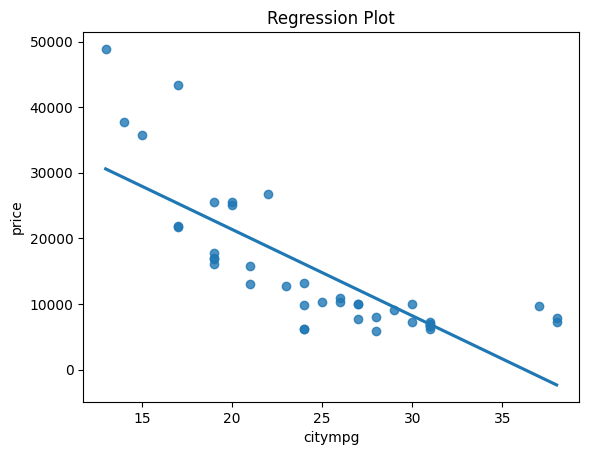

In [119]:
sns.regplot(x=x_test.citympg, y=pred, ci=None)
plt.xlabel('citympg')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

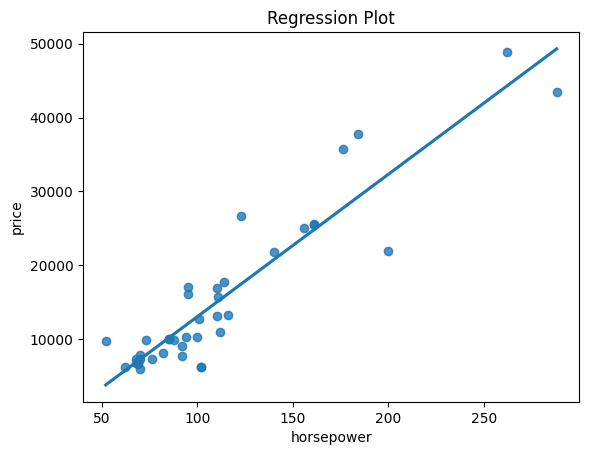

In [120]:
sns.regplot(x=x_test.horsepower, y=pred, ci=None)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

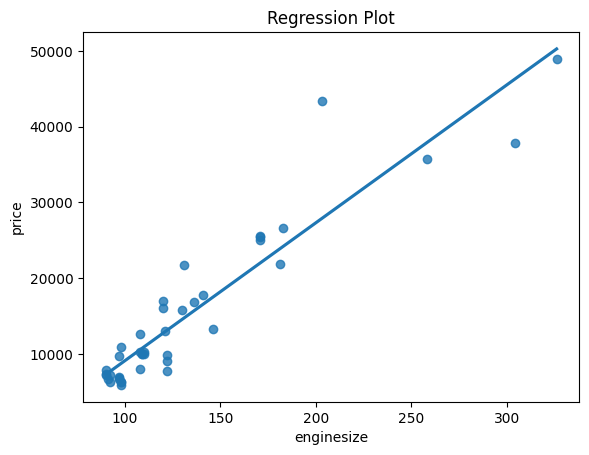

In [121]:
sns.regplot(x=x_test.enginesize, y=pred, ci=None)
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

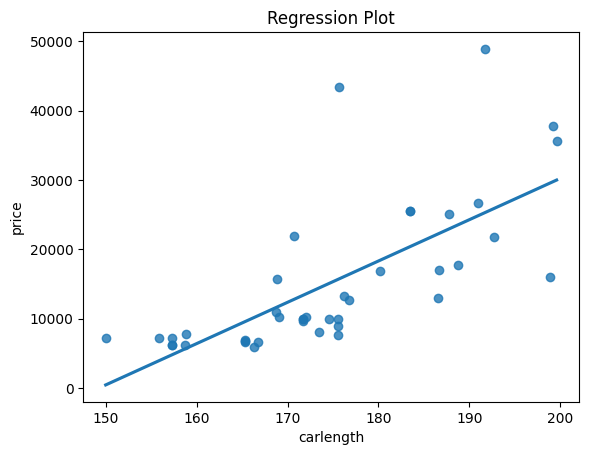

In [122]:
sns.regplot(x=x_test.carlength, y=pred, ci=None)
plt.xlabel('carlength')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

In [123]:
reg.score(x_test,y_test)

0.7775022091083107

####  The score is the measure that shows how well the model fits the test data. This value indicates the model's predictive accuracy, and ranges from 0 to 1, with higher values indicating a better fit. An R-squared score of 0.86 means that the model explains 86% of the variance in the test data.

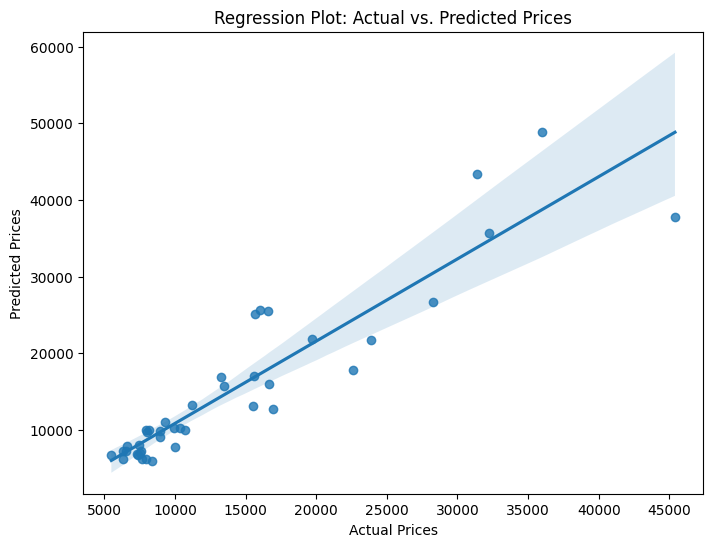

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Create a regression plot (scatter plot with a regression line)
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Plot: Actual vs. Predicted Prices')
plt.show()

In [125]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Import r2_score

mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, pred)
print("R-squared (coefficient of determination):", r_squared)

Mean Squared Error (MSE): 18536435.844559543
Root Mean Squared Error (RMSE): 4305.396130968617
Mean Absolute Error (MAE): 2814.1564070248287
R-squared (coefficient of determination): 0.7775022091083107


In [126]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = df[[ 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=42)

# Create the Decision Tree Regressor object
regressor = DecisionTreeRegressor(max_depth=8, random_state=100)

# Fit the model
regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_d = regressor.predict(x_test)

In [127]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [128]:
pred_d

array([36880.        , 23875.        ,  9383.66666667, 11932.        ,
       31600.        ,  6434.44444444,  7957.16666667,  7957.16666667,
        9383.66666667,  7995.        , 24565.        ,  7957.16666667,
       12764.        , 11248.        , 45400.        ,  6693.5       ,
        5472.75      , 12764.        ,  7262.33333333,  9383.66666667,
       10245.        , 14255.66666667,  6434.44444444,  5472.75      ,
        7609.        , 36880.        ,  9989.        , 15801.25      ,
        7122.        , 15801.25      , 31600.        ,  7609.        ,
        9136.5       , 18179.4       ,  7957.        , 31600.        ,
        9383.66666667, 13295.        ,  6575.        , 14255.66666667,
        7957.16666667,  8845.        , 16695.        ,  9136.5       ,
        7122.        ,  7957.16666667,  7609.        ,  7957.16666667,
       17950.        , 12764.        ,  8916.5       , 18179.4       ,
        5472.75      , 10898.        ,  7122.        , 16500.        ,
      

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred_d)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_d)
r_squared = r2_score(y_test, pred_d)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (coefficient of determination):", r_squared)

Mean Squared Error (MSE): 8648624.418737555
Root Mean Squared Error (RMSE): 2940.854368842081
Mean Absolute Error (MAE): 1973.0539372759856
R-squared (coefficient of determination): 0.8751720865209603


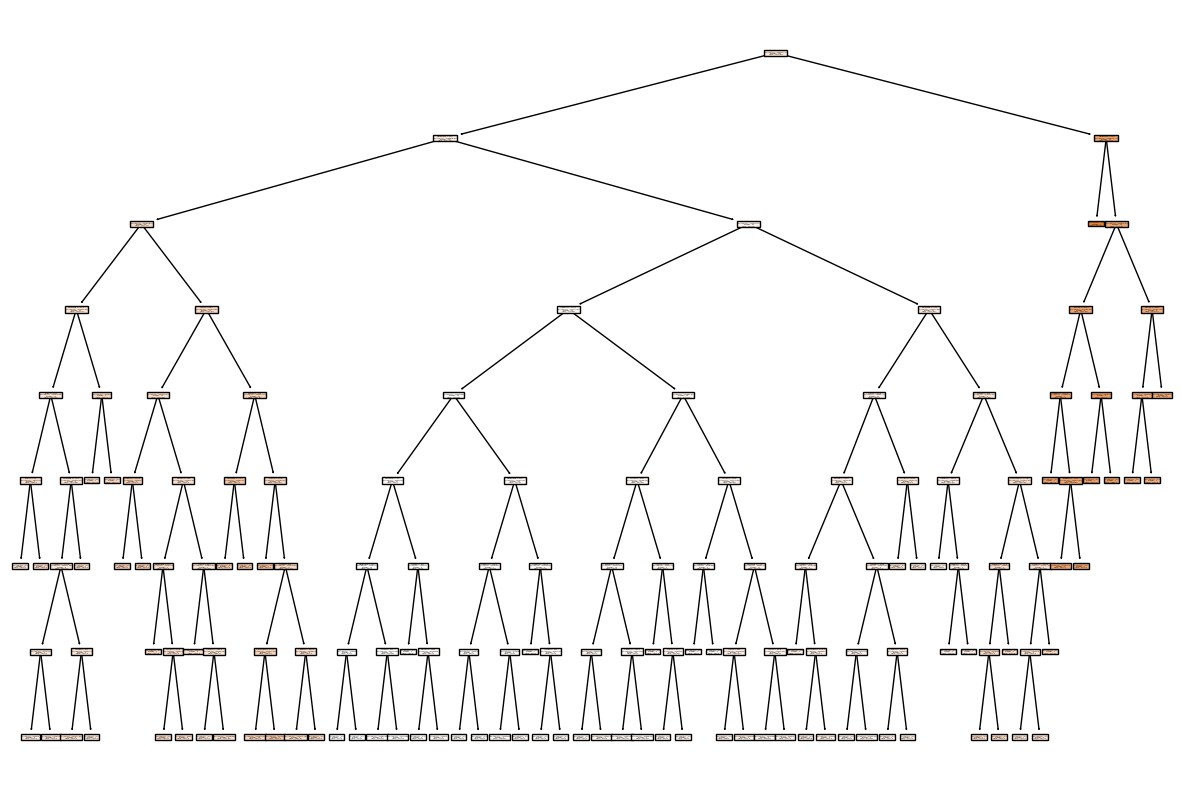

In [130]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=x.columns.tolist())
plt.show()

## Random Forest Regressor

In [132]:
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [133]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [135]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})

In [136]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,2,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,2,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,2,front,94.5,171.2,65.5,52.4,2823,...,True,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,4,front,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,4,front,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,front,109.1,188.8,68.9,55.5,2952,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,volvo 144ea,4,front,109.1,188.8,68.8,55.5,3049,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,volvo 244dl,4,front,109.1,188.8,68.9,55.5,3012,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,volvo 246,4,front,109.1,188.8,68.9,55.5,3217,...,False,False,False,False,False,True,False,False,False,False


In [137]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#  label encoding to the 'symboling' column
df['symboling'] = label_encoder.fit_transform(df['symboling'])

df['doornumber'] = label_encoder.fit_transform(df['doornumber'])

df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])
df.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [138]:
#x is the independent and y is the dependent variable
x = df[['symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',  'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df['price'] 

In [139]:
# Step2: Split the training test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [140]:
# Step 3: Fit a Decision Tree model as comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create and fit a Decision Tree Regressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([36880., 15998.,  8949., 11694., 33900.,  5195.,  7126.,  8358.,
        8845.,  7995., 15250.,  8058., 11694., 11248., 45400.,  6338.,
        5572., 12764.,  6989.,  9095., 10245., 13499.,  7099.,  5389.,
        7609., 36880.,  8449., 16515.,  7349., 15985., 33900.,  6229.,
        6785., 22018.,  7957., 35056., 11694., 11845.,  6575., 14869.,
        8949.])

In [141]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (coefficient of determination):", r_squared)

Mean Squared Error (MSE): 8008525.167119244
Root Mean Squared Error (RMSE): 2829.933774334524
Mean Absolute Error (MAE): 1886.138219512195
R-squared (coefficient of determination): 0.8985543796999212


## SVM

In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[[ 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model
gb_predictions = gb_regressor.predict(x_test)

# Now, use the predictions as input features for the SVM
x_combined = np.column_stack((x_test, gb_predictions))

# Create the Support Vector Machine Regressor (SVM)
svm_regressor = SVR(kernel='linear', C=1.0)

# Fit the SVM model
svm_regressor.fit(x_combined, y_test)

# Predict the values of the test data using the SVM
pred_s = svm_regressor.predict(x_combined)

In [143]:
pred_s

array([32522.25765168, 17173.75015952,  8975.94459788, 12278.12081441,
       28303.75533485,  7028.84544713,  7819.40339036,  7552.69267877,
        9040.44440774,  7748.04259821, 14149.78167047,  7381.9552746 ,
       13658.45776593, 10917.39406229, 41064.37133562,  6486.69297139,
        5656.71642331, 12634.13855853,  8223.26141546,  8701.78570332,
       10010.08592063, 14847.53540047,  7035.4243057 ,  6453.42085623,
        6691.26990935, 31798.45642226, 10117.31598755, 14825.92012488,
        7125.98423231, 15042.8945589 , 28816.74122333,  6733.83101007,
        6869.14140543, 18963.96436461,  8058.47298383, 27785.74502402,
        9455.52736212, 11061.61368554,  6962.64768107, 13392.22558101,
        7998.71621168])

In [144]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_s)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_s)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_s)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 4029649.2613482084
Root Mean Squared Error (RMSE): 2007.398630404088
Mean Absolute Error (MAE): 1181.4042930547596
R-squared (coefficient of determination): 0.9489556116290174


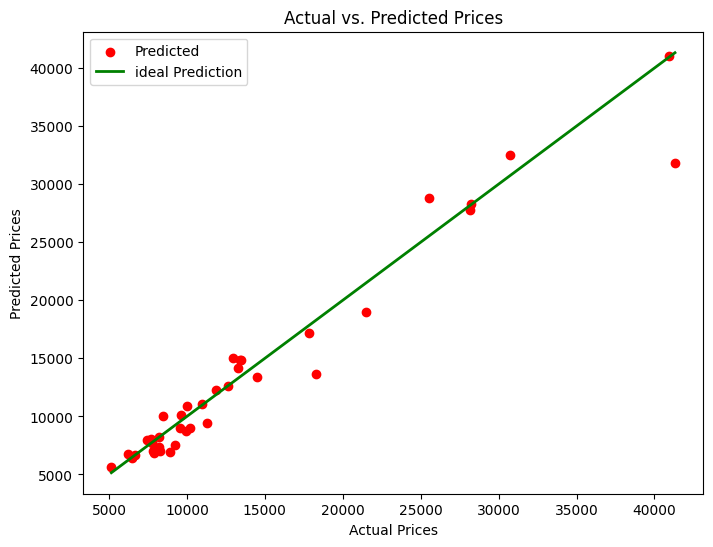

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_s, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='-', linewidth=2, label='ideal Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()